In [1]:

# ===============================================
# Full SVD Project for Uploaded Data (Skipping x,y,z)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Step 1: Load the dataset
df = pd.read_excel('10 occ.xlsx')  # Make sure this file is in your working directory

# Step 2: Prepare data
# First three columns are (x, y, z) directions — we skip them
X = df.iloc[:, 3:].values

# Step 3: Center the data (subtract mean)
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 4: Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=min(X_centered.shape))
U = svd.fit_transform(X_centered)
S = svd.singular_values_
V = svd.components_

# Step 5: Calculate energy captured by each mode
energy_each_mode = (S**2) / np.sum(S**2) * 100

# Step 6: Save outputs
# Save U, S, V, Energy into Excel files
U_df = pd.DataFrame(U)
S_df = pd.DataFrame(S, columns=["Singular Values"])
V_df = pd.DataFrame(V)
Energy_df = pd.DataFrame(energy_each_mode, columns=["Energy Contribution (%)"])

U_df.to_excel('U_matrix.xlsx', index=False)
S_df.to_excel('S_values.xlsx', index=False)
V_df.to_excel('V_matrix.xlsx', index=False)
Energy_df.to_excel('Energy_modes.xlsx', index=False)

# Step 7: Plot Energy Contribution
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(S)+1), energy_each_mode, 'o-', linewidth=2, color='blue')
plt.title('Energy Captured by Each SVD Mode')
plt.xlabel('Mode Number')
plt.ylabel('Energy Contribution (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('SVD_Energy_Plot.png')
plt.show()

print('SVD Project completed! Outputs are saved as Excel files and a plot.')


FileNotFoundError: [Errno 2] No such file or directory: '10 occ.xlsx'

In [2]:

# ========================================
# Python Code to plot CO₂ and Temperature fields as 2D images
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_excel('10 occ.xlsx')  # Update the path if needed

# Step 2: Skip the first three columns (x, y, z)
X_data = df.iloc[:, 3:]

# Step 3: Extract CO₂ and Temperature fields
co2_field = X_data['co2'].values
temperature_field = X_data['temperature'].values

# Step 4: Guess the 2D grid size
n_points = len(co2_field)
grid_x = int(np.sqrt(n_points))
grid_y = int(np.ceil(n_points / grid_x))

print(f"Reshaping into grid of {grid_y} rows × {grid_x} columns.")

# Step 5: Reshape
co2_grid = co2_field.reshape((grid_y, grid_x))
temperature_grid = temperature_field.reshape((grid_y, grid_x))

# Step 6: Plot CO₂ Field
plt.figure(figsize=(10, 6))
plt.imshow(co2_grid, cmap='coolwarm', origin='lower')
plt.colorbar(label='CO₂ Concentration')
plt.title('2D CO₂ Field')
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.tight_layout()
plt.show()

# Step 7: Plot Temperature Field
plt.figure(figsize=(10, 6))
plt.imshow(temperature_grid, cmap='viridis', origin='lower')
plt.colorbar(label='Temperature [K]')
plt.title('2D Temperature Field')
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.tight_layout()
plt.show()


Reshaping into grid of 313 rows × 312 columns.


ValueError: cannot reshape array of size 97562 into shape (313,312)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Step 1: Load the image
image_path = 'Picture2.jpg'  # Your image name
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_np = np.array(image)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Step 1: Load the image
image_path = 'Picture3.jpg'  # Your image name
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_np = np.array(image)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Step 1: Load the image in color
image_path = 'Picture3.jpg'  # Your image name
image = Image.open(image_path).convert('RGB')
image_np = np.array(image)


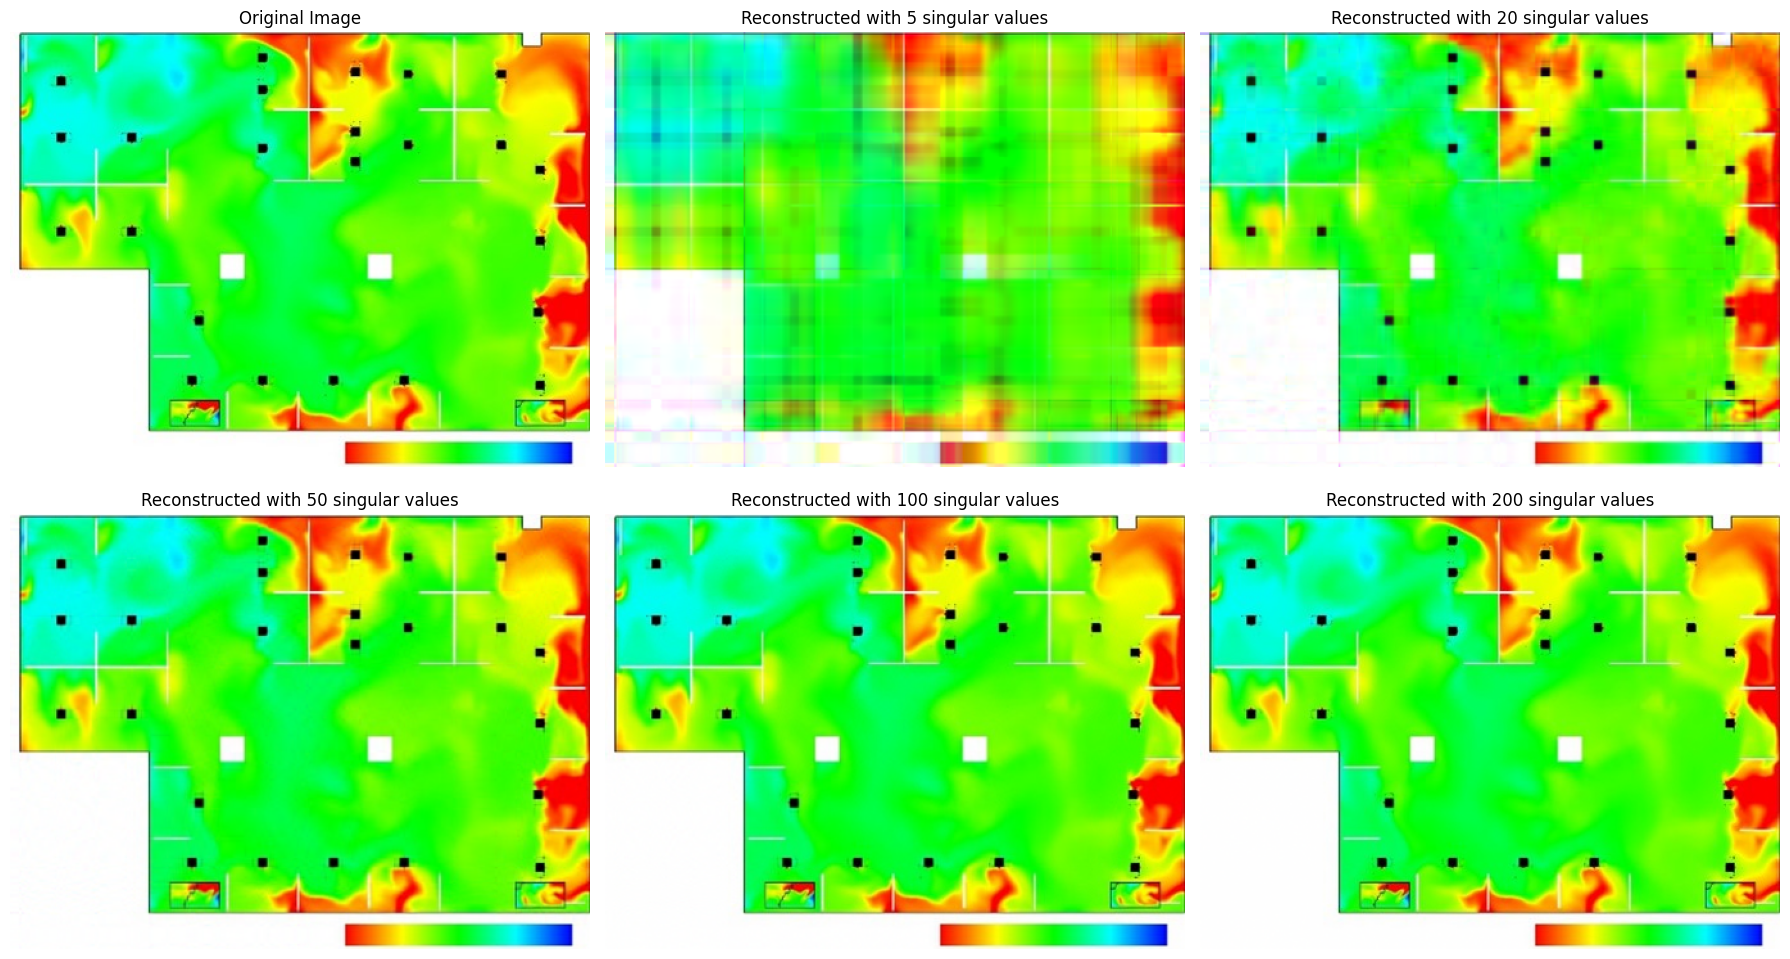

✅ All reconstructed images are saved in: /mnt/data/svd_color_reconstruction_outputs


In [13]:

# Step 2: Split into R, G, B channels
R = image_np[:,:,0]
G = image_np[:,:,1]
B = image_np[:,:,2]

# Step 3: Define SVD and Reconstruction function
def svd_reconstruct(channel, k):
    U, sigma, VT = np.linalg.svd(channel, full_matrices=False)
    S_k = np.diag(sigma[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    reconstructed = np.dot(U_k, np.dot(S_k, VT_k))
    return np.clip(reconstructed, 0, 255)

# Step 4: Choose k values
k_values = [5, 20, 50, 100, 200]

# Step 5: Create folder to save images
output_folder = '/mnt/data/svd_color_reconstruction_outputs'
os.makedirs(output_folder, exist_ok=True)

# Step 6: Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot original image
ax = axes[0, 0]
ax.imshow(image_np)
ax.set_title("Original Image")
ax.axis('off')

# Save original image
original_save_path = os.path.join(output_folder, 'original_image.png')
Image.fromarray(image_np).save(original_save_path)

# Reconstructed images
for idx, k in enumerate(k_values):
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    ax = axes[row, col]
    
    R_rec = svd_reconstruct(R, k)
    G_rec = svd_reconstruct(G, k)
    B_rec = svd_reconstruct(B, k)
    
    reconstructed_color = np.stack([R_rec, G_rec, B_rec], axis=2).astype(np.uint8)
    
    ax.imshow(reconstructed_color)
    ax.set_title(f'Reconstructed with {k} singular values')
    ax.axis('off')
    
    # Save reconstructed image
    save_path = os.path.join(output_folder, f'reconstructed_{k}_singular_values.png')
    Image.fromarray(reconstructed_color).save(save_path)

plt.tight_layout()
plt.show()

print(f"✅ All reconstructed images are saved in: {output_folder}")


In [6]:
from PIL import Image
import os
import glob

# Set your folder paths
input_folder = "C:/Users/mlesan4/Downloads/New folder"
output_folder = "C:/Users/mlesan4/Downloads/Resized_Images"
os.makedirs(output_folder, exist_ok=True)

# Desired image size
target_size = (400, 300)  # width x height

# Resize all .png images in the folder
image_paths = glob.glob(os.path.join(input_folder, "*.png"))

for i, path in enumerate(sorted(image_paths)):
    img = Image.open(path)
    img_resized = img.resize(target_size)
    filename = os.path.basename(path)
    img_resized.save(os.path.join(output_folder, filename))

print(f"✅ All images resized and saved to: {output_folder}")


✅ All images resized and saved to: C:/Users/mlesan4/Downloads/Resized_Images


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# List of image file paths
image_files = ["image1.png", "image2.png", ..., "image10.png"]  # Replace with actual paths

# Resize and flatten images
img_size = (300, 400)
snapshots = []
for path in image_files:
    img = Image.open(path).convert('L').resize((img_size[1], img_size[0]))
    snapshots.append(np.array(img).flatten())
S = np.array(snapshots).T  # (pixels, time)

# Perform SVD
U, Sigma, VT = np.linalg.svd(S, full_matrices=False)
energy = np.cumsum(Sigma**2) / np.sum(Sigma**2)

# Plot POD modes
for i in range(3):
    plt.imshow(U[:, i].reshape(img_size), cmap='jet')
    plt.title(f'POD Mode {i+1} ({energy[i]*100:.2f}% energy)')
    plt.axis('off')
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mlesan4\\Downloads\\New folder\\image1.png'

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Step 1: Set working directory to the folder with resized images
os.chdir(r"C:\path\to\resized_images")  # 🔁 Change this path to where you extracted the ZIP

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\path\\to\\resized_images'